# Парсинг

Импорт

In [ ]:
import requests
from bs4 import BeautifulSoup

Получение данных

In [ ]:
def get_data(url, filename):
  headers = {
      "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 12_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"
  }

  req = requests.get(url, headers)

  with open(f"{filename}.html", "w") as file:
    file.write(req.text)
 

headers = {
      "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 12_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"
}

count = 10
for i in range(1, count+1):
  print(i)
  get_data("https://memepedia.ru/memoteka/page/"+str(i)+'/', "index"+ str(i))

1
2
3
4
5
6
7
8
9
10


Получение всех ссылок

In [ ]:
def get_links(url, filename):
  with open(filename) as file:
    src = file.read()
  
  soup = BeautifulSoup(src, "lxml")
  lis = soup.find("div", class_ = "bb-col col-content").find_all("div", class_="post-thumbnail")

  project_urls = []

  for li in lis:
    for a in li.find_all("a"):
      project_urls.append(a.get("href"))
  
  for project_url in project_urls:
    req = requests.get(project_url, headers)
  
  return project_urls
 
all_articles = []
for i in range(1, count + 1):
  print(i)
  all_articles.append(get_links("https://memepedia.ru/memoteka/page/"+str(i)+'/', "index"+ str(i)+".html"))

1
2
3
4
5
6
7
8
9
10


Создание папки для хранения страниц

In [ ]:
!mkdir data

Получение информации с сайтов

In [ ]:
def get_info(all_articles, folder_name):
  par_names = []
  par_categories = []
  par_dates = []
  par_watches = []
  
  for project_url in all_articles:
    req = requests.get(project_url, headers)
    project_name = project_url.split("/")[-2]

    with open(f"{folder_name}/{project_name}.html", "w") as file:
      file.write(req.text)
    
    with open(f"{folder_name}/{project_name}.html") as file:
      src = file.read()
    
    try:
      soup = BeautifulSoup(src, "lxml")
      par_name = soup.body.h1.find_next(string=True)

      spans = soup.select('li.ordinal-item span')
      spans = [span.text for span in spans]
      par_category = spans[1]

      var = soup.find("div", class_="s-post-meta-block bb-mb-el")
      par_date = var.find('time')['datetime']

      par_watch = soup.find("div", class_="s-post-meta bb-post-meta size-lg").find("span", class_="count").text

      par_names.append(par_name)
      par_categories.append(par_category)
      par_dates.append(par_date)
      par_watches.append(par_watch)
    except:
      print("Problem with page: " + str(project_name))
      pass
  return par_names, par_categories, par_dates, par_watches

res = []
for i in range(len(all_articles)):
  print(i)
  res.append(get_info(all_articles[i], "data"))

0
1
2
3
4
Problem with page: oguzok
5
6
Problem with page: antishapochniki
7
Problem with page: baza
Problem with page: kizyaka
8
9
Problem with page: vosxishhajsya-estetikoj
Problem with page: kokichi-2020


In [ ]:
import numpy as np

par_names = []
par_categories = []
par_dates = []
par_watches = []

for i in range(len(res)):
  for j in range(len(res[i][0])):
    par_names.append(res[i][0][j])
  
  for k in range(len(res[i][1])):
    par_categories.append(res[i][1][k])
  
  for l in range(len(res[i][2])):
    par_dates.append(res[i][2][l])
  
  for m in range(len(res[i][3])):
    par_watches.append(res[i][3][m])

with open('data.csv', 'a') as file:
    for i in range(len(par_names)):
      if i - 1 < len(par_names):
        file.write(str(par_names[i]) + ';' + str(par_categories[i]) + ';' + str(par_dates[i]) + ';' + str(par_watches[i]) + '\n')

In [ ]:
from google.colab import files

files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Аналитика

In [ ]:
import pandas as pd

df = pd. read_csv("data.csv", sep=";", names = ["names", "categories", "dates", "watches"])

In [ ]:
df

,names,categories,dates,watches
0,Волшебник смотрит на шар,Пикча,2021-12-16T12:30:39+00:00,194
1,Насколько же ты отчаялся,Пикча,2021-12-15T14:51:29+00:00,126
2,Иван Золо 2004,Персоны,2021-12-14T11:16:39+00:00,9.3k
3,"Чел хорош, мегахорош, неплох",Видео,2021-12-12T12:36:10+00:00,1.7k
4,Нового года не будет,Видео,2021-12-10T11:41:43+00:00,1.9k
...,...,...,...,...
169,Бонк,Пикча,2021-02-18T11:52:52+00:00,12.7k
170,Повезло повезло,Видео,2021-02-18T00:10:17+00:00,61.7k
171,Годзилла и Конг против Чимса,Пикча,2021-02-17T23:33:40+00:00,9.4k
172,Отче наш иже еси на небеси,Пикча,2021-02-16T11:48:50+00:00,5.4k


174

In [ ]:
from datetime import datetime

def to_number(num):
  if num[-1] == 'k':
    num = float(num.split("k")[0]) * 1000
  else:
    num = float(num)
  return int(num)

def to_date(line):
  date_time = line.split("T")
  date = date_time[0]
  time = date_time[1].split("+")[0]

  day = datetime.strptime(date + " " + time, "%Y-%m-%d %H:%M:%S")
  return day

df_watches = []
df_names = []
df_categories = []
df_dates = []

for i in range(df["watches"].size):
  df_watches.append(to_number(df["watches"][i]))
  df_dates.append(to_date(df["dates"][i]))
  df_names.append(df["names"][i])
  df_categories.append(df["categories"][i])

print(df_watches)
print(df_names)
print(df_categories)
print(df_dates)

[194, 126, 9300, 1700, 1900, 20200, 8900, 4300, 79200, 162500, 1700, 11500, 18000, 10300, 6400, 5000, 2300, 17900, 5500, 15100, 14500, 4700, 22000, 3300, 4500, 2400, 9700, 3800, 3400, 3600, 1900, 3700, 8700, 4800, 30400, 2800, 5400, 7400, 3200, 1900, 9200, 20200, 9100, 3400, 1600, 18900, 2300, 4100, 1500, 23900, 11800, 3100, 2700, 13000, 2700, 1200, 5500, 39200, 1700, 1900, 3100, 226900, 4100, 11400, 30300, 9100, 8700, 2400, 17000, 7300, 1700, 4500, 4700, 1000, 35200, 16600, 2000, 18500, 4500, 11200, 3800, 6600, 45800, 2600, 10600, 7900, 50800, 6800, 25000, 69900, 1500, 2800, 17600, 1500, 5300, 5400, 7600, 2700, 43500, 1700, 1200, 12900, 1700, 4300, 3000, 3000, 19600, 5500, 13300, 20800, 2400, 3200, 4500, 2400, 987, 95500, 1200, 3700, 13200, 89600, 2100, 11500, 4600, 787, 18400, 3100, 21400, 4200, 2200, 66800, 24000, 26400, 3300, 8100, 16700, 1200, 4800, 4800, 79300, 3100, 87100, 167200, 120800, 28100, 1000, 57600, 3400, 1800, 4600, 1200, 2600, 6900, 3600, 27500, 19900, 12100, 16000, 2

Проверим популярность по просмотрам в каждом жанре: 
ПИКЧА
ВИДЕО
СЛЕНГ
КОМИКС
ПЕРСОНЫ
ФЕЙСЫ
ТРЕНДЫ

In [ ]:
sum_pic = 0
sum_video = 0
sum_slang = 0
sum_comics = 0
sum_person = 0
sum_face = 0
sum_trand = 0

for i in range(len(df_watches)):
  if df_categories[i] == 'Пикча':
    sum_pic += df_watches[i]
  elif df_categories[i] == 'Видео':
    sum_video += df_watches[i]
  elif df_categories[i] == 'Сленг':
    sum_slang += df_watches[i]
  elif df_categories[i] == 'Комикс':
    sum_comics += df_watches[i]
  elif df_categories[i] == 'Персоны':
    sum_person += df_watches[i]
  elif df_categories[i] == 'Фейсы':
    sum_face += df_watches[i]
  elif df_categories[i] == 'Тренды':
    sum_trand += df_watches[i]

y = [sum_pic, sum_video, sum_slang, sum_comics, sum_person, sum_face, sum_trand]
x = ['Пикча', 'Видео', 'Сленг', 'Комикс', 'Персоны', 'Фейсы', 'Тренды']

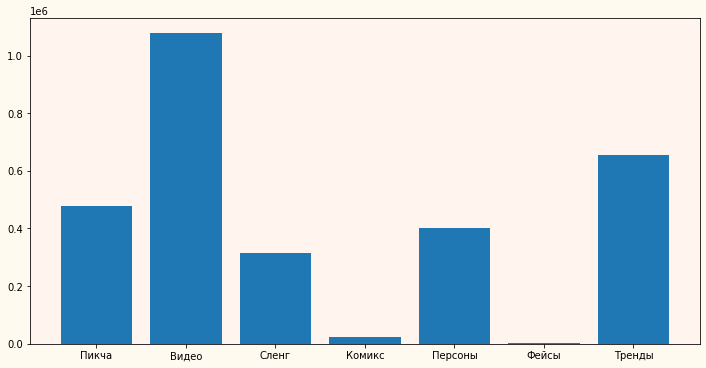

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    
fig.set_figheight(6)   

plt.show()

Найдем самую популярную статью

In [ ]:
mx = max(df_watches)
m = [i for i,j in enumerate(df_watches) if j==mx]
print("Самая популярная статья: " + str(df_names[m[0]]))

Самая популярная статья: Желтая египетская кошка Ankha


Посмотрим распределение количества публикации статей по промежуткам времени: [0-3), [3-6)..

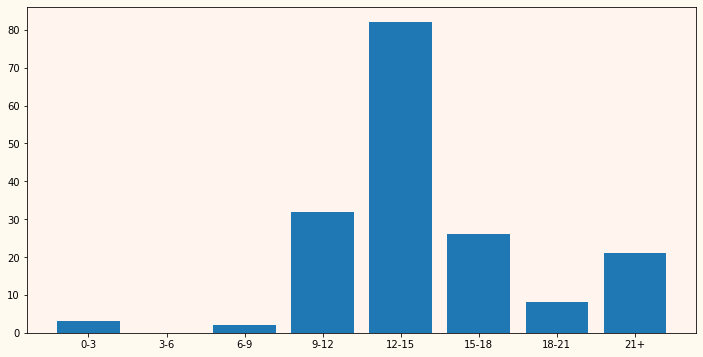

In [ ]:
distances = [0, 0, 0, 0, 0, 0, 0, 0]
times = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21+',]

for i in range(len(df_names)):
  if df_dates[i].hour >= 0 and df_dates[i].hour < 3:
    distances[0] += 1
  elif df_dates[i].hour >= 3 and df_dates[i].hour < 6:
    distances[1] += 1
  elif df_dates[i].hour >= 6 and df_dates[i].hour < 9:
    distances[2] += 1
  elif df_dates[i].hour >= 9 and df_dates[i].hour <12:
    distances[3] += 1
  elif df_dates[i].hour >= 12 and df_dates[i].hour < 15:
    distances[4] += 1
  elif df_dates[i].hour >= 15 and df_dates[i].hour < 18:
    distances[5] += 1
  elif df_dates[i].hour >= 18 and df_dates[i].hour < 21:
    distances[6] += 1
  elif df_dates[i].hour >= 21:
    distances[7] += 1

fig, ax = plt.subplots()
ax.bar(times, distances)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    
fig.set_figheight(6)   

plt.show()

 То есть большинство публикаций или обновлений статей проходило примерно в 12-15 часов дня

In [ ]:
import time
start_time = time.time()
a = 0
a += 1
print("--- %ms seconds ---" % (time.time() - start_time))